# IMDB Neural Network Sentiment Analysis

Using Keras to build a neural network that scores text for sentiment. An input such as "Great service, and some of the best sushi I've ever tasted" will score close to 1.0 indicating the sentiment is positive, while an input such as "The food was bland and the service was terrible" will score closer to 0.0. 

The IMDB dataset contains 50,000 movie reviews that have been individually scored as positive (1) or negative (0). The dataset is divided into 25,000 reviews for training and 25,000 reviews for testing. 

In [1]:
#Import keras datasets for IMDB reviews
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


## Some starting Info

Each word is assigned a unique integer. The most common word is assigned the number 1, the second most common word is assigned the number 2, and so on.

load_data also returns a pair of tuples containing the movie reviews (in this example, x_train and x_test) and the 1s and 0s classifying those reviews as positive and negative (y_train and y_test).

The variable named x_train is a list of 25,000 lists, each of which represents one movie review. (x_test is also a list of 25,000 lists representing 25,000 reviews. x_train will be used for training, while x_test will be used for testing.)

The reason the inner lists contain numbers rather than text is that you don't train a neural network with text; you train it with numbers. Specifically, you train it with tensors.

In [2]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

The first number in the list — 1 — doesn't represent a word at all. It marks the start of the review and is the same for every review in the dataset. The numbers 0 and 2 are reserved as well, and you subtract 3 from the other numbers to map an integer in a review to the corresponding integer in the dictionary. The second number — 14 — references the word that corresponds to the number 11 in the dictionary, the third number represents the word assigned the number 19 in the dictionary, and so on.

In [3]:
# let's look at the dictionary
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# This reverse encodes the first review
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

When you train a neural network with collection of tensors, each tensor needs to be the same length. At present, the lists representing reviews in x_train and x_test have varying lengths.

In [5]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

## Model Building

In [6]:
##### Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32


# instantiates a Sequential object representing a "sequential" model — 
# one that is composed of an end-to-end stack of layers in which the output from one layer provides input to the next.
model = Sequential()

# crucial to neural networks that process words.
# The embedding layer essentially maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions. 
# It also allows words with similar meanings to be treated alike.
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# "compiles" the model by specifying important parameters such as which optimizer 
#to use and what metrics to use to judge the accuracy of the model in each training step
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# 10 epochs means the model will pass 10 times learning each time it passes through
# tells Keras to use 128 training samples at a time to train the network. Larger batch sizes speed the 
#    training time (fewer passes are required in each epoch to 
#    consume all of the training data), but smaller batch sizes sometimes increase accuracy.

                                                                        #originally I had 5 and 128 but found this combo is better
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 61s 2ms/step - loss: 0.4713 - acc: 0.7351 - val_loss: 0.3203 - val_acc: 0.8613
Epoch 2/3
25000/25000 [==============================] - 55s 2ms/step - loss: 0.1667 - acc: 0.9387 - val_loss: 0.3438 - val_acc: 0.8588
Epoch 3/3
25000/25000 [==============================] - 56s 2ms/step - loss: 0.0419 - acc: 0.9895 - val_loss: 0.4204 - val_acc: 0.8651


## Vizualization and Validation

[]

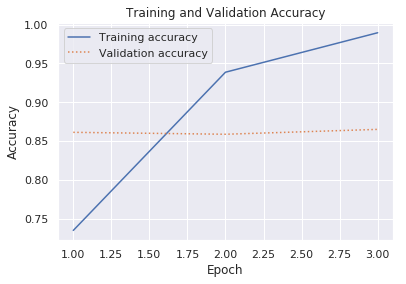

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

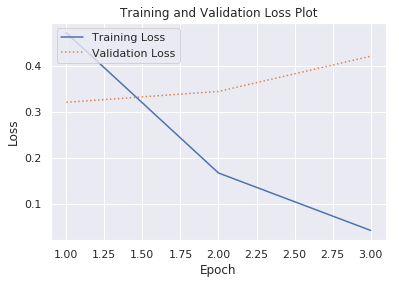

In [9]:
sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Loss')
plt.plot(epochs, val, ':', label='Validation Loss')
plt.title('Training and Validation Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

Finally, let's determine how accurately the model is able to quantify the sentiment expressed in text based on the test data in x_test (reviews) and y_test (0s and 1s, or "labels," indicating which reviews are positive and which are negative):

In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.51%


This is passable. However, in the future we may want to bring down the number of epochs as the model may start being overfit after the 3rd runthrough

In [11]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

These statements define a function named analyze that accepts a string as input and returns a number from 0.0 to 1.0 quantifying the sentiment expressed in that string. The higher the number, the more positive the sentiment. The function cleans the input string, converts it into a list of integers referencing words in the dictionary created by the load_data function, and finally calls the model's predict function to score the text for sentiment.

## Use of the Neural Network

In [12]:
analyze('Easily the most stellar experience I have ever had.')

0.98573864

In [13]:
analyze('The long lines and poor customer service really turned me off.')

0.09508431